In [ ]:
!pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elzaffr","key":"058232d3724d43d43b33c129a14d4f5a"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s 'Brain Tumor Classification (MRI)'

ref                                                       title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sartajbhuvaji/brain-tumor-classification-mri              Brain Tumor Classification (MRI)                87MB  2020-05-24 16:24:55          15169        313  0.8125           
jarvisgroot/brain-tumor-classification-mri-images         Brain Tumor Classification MRI Images          633MB  2021-07-04 21:21:38            479         27  0.9375           
masoudnickparvar/brain-tumor-mri-dataset                  Brain Tumor MRI Dataset                        149MB  2021-09-24 12:43:45           3249         95  0.875            
ahmedhamada0/brain-tumor-detection                        Br35H :: Brain Tumor Detection 2020             84MB  202

In [ ]:
!kaggle datasets download -d 'sartajbhuvaji/brain-tumor-classification-mri'

 99% 86.0M/86.8M [00:00<00:00, 170MB/s]
100% 86.8M/86.8M [00:00<00:00, 170MB/s]


In [ ]:
import zipfile,os,shutil

In [ ]:
fileZip = "brain-tumor-classification-mri.zip"
extracZip = zipfile.ZipFile(fileZip, 'r')
extracZip.extractall("datasets")

In [ ]:
os.listdir("/content/datasets")

['Training', 'Testing']

#Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/content/datasets'):
    for filename in filenames:
      print(os.path.join(dirname, filename))

/content/datasets/Training/glioma_tumor/gg (333).jpg
/content/datasets/Training/glioma_tumor/gg (348).jpg
/content/datasets/Training/glioma_tumor/gg (102).jpg
/content/datasets/Training/glioma_tumor/gg (303).jpg
/content/datasets/Training/glioma_tumor/gg (434).jpg
/content/datasets/Training/glioma_tumor/gg (798).jpg
/content/datasets/Training/glioma_tumor/gg (308).jpg
/content/datasets/Training/glioma_tumor/gg (808).jpg
/content/datasets/Training/glioma_tumor/gg (722).jpg
/content/datasets/Training/glioma_tumor/gg (356).jpg
/content/datasets/Training/glioma_tumor/gg (432).jpg
/content/datasets/Training/glioma_tumor/gg (515).jpg
/content/datasets/Training/glioma_tumor/gg (649).jpg
/content/datasets/Training/glioma_tumor/gg (42).jpg
/content/datasets/Training/glioma_tumor/gg (594).jpg
/content/datasets/Training/glioma_tumor/gg (402).jpg
/content/datasets/Training/glioma_tumor/gg (265).jpg
/content/datasets/Training/glioma_tumor/gg (772).jpg
/content/datasets/Training/glioma_tumor/gg (382

#Color

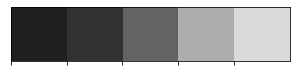

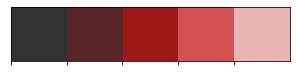

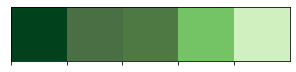

In [ ]:
colors_dark = ["#1F1F1F", "#313131", "#636363", "#AEAEAE", "#DADADA"]
colors_red = ["#313131", "#582626", "#9E1717", "#D35151", "#E9B4B4"]
colors_green = ['#01411C', '#4B6F44', '#4F7942', '#74C365', '#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_green)

#Data Preparation

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
labels[1] #contoh hasil sesuai index

'no_tumor'

In [ ]:
x_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('../content/datasets','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        x_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('../content/datasets','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        x_train.append(img)
        y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 136.89it/s]


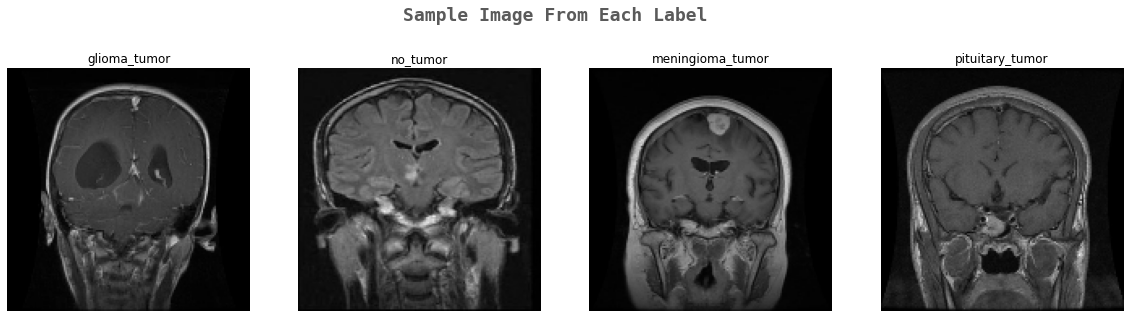

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
         fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
  j=0
  while True :
    if y_train[j]==i:
      ax[k].imshow(x_train[j])
      ax[k].set_title(y_train[j])
      ax[k].axis('off')
      k+=1
      break
    j+=1

In [ ]:
x_train, y_train = shuffle(x_train,y_train, random_state=101)

In [ ]:
x_train.shape

(3264, 150, 150, 3)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)
x_train.shape

(3264, 150, 150, 3)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train, test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

#Transfer Learning

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 151, 151, 3)  0           ['normalization[0][0]']      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= 'Adam', metrics= ['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir= 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor= 'val_accuracy', factor= 0.3, patience= 2, min_delta= 0.001,
                              mode='auto',verbose=1)

#Training The Model

In [ ]:
history = model.fit(x_train,y_train,validation_split=0.1, epochs=12,steps_per_epoch = 10, verbose=1, batch_size=32,
                    callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
10/10 [==============================] - ETA: 0s - loss: 0.9730 - accuracy: 0.6438
Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to effnet.h5
10/10 [==============================] - 52s 4s/step - loss: 0.9730 - accuracy: 0.6438 - val_loss: 0.9845 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 2/12
10/10 [==============================] - ETA: 0s - loss: 0.5377 - accuracy: 0.7781
Epoch 2: val_accuracy did not improve from 0.57143
10/10 [==============================] - 44s 4s/step - loss: 0.5377 - accuracy: 0.7781 - val_loss: 1.1425 - val_accuracy: 0.5476 - lr: 0.0010
Epoch 3/12
10/10 [==============================] - ETA: 0s - loss: 0.4300 - accuracy: 0.8313
Epoch 3: val_accuracy improved from 0.57143 to 0.77551, saving model to effnet.h5
10/10 [==============================] - 44s 5s/step - loss: 0.4300 - accuracy: 0.8313 - val_loss: 0.7424 - val_accuracy: 0.7755 - lr: 0.0010
Epoch 4/12
10/10 [==============================] - ETA: 0s - loss: 0.5162 - acc

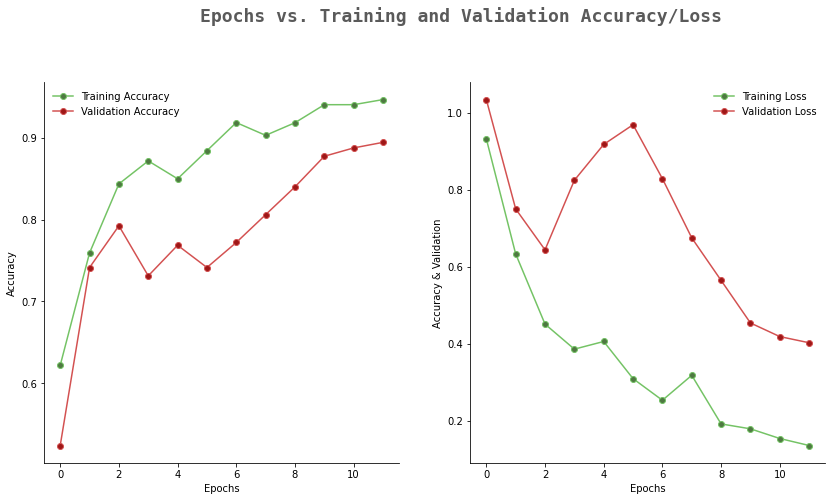

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18,fontweight='bold',
         fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy & Validation')

fig.show()

#Prediction

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

#Evaluation

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89        93
           1       0.85      0.86      0.85        51
           2       0.98      0.61      0.76        96
           3       0.88      0.99      0.93        87

    accuracy                           0.86       327
   macro avg       0.88      0.87      0.86       327
weighted avg       0.88      0.86      0.85       327



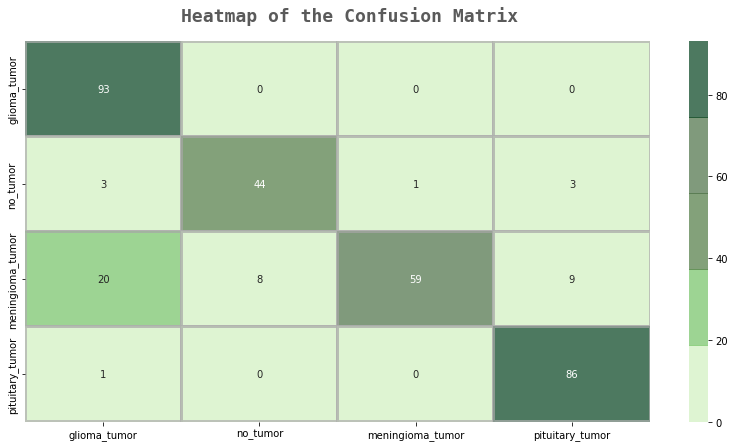

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
def img_pred(upload):
  for name, file_info in uploader.value.items():
    img = Image.open(io.BytesIO(file_info['content']))
  opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
  img = cv2.resize(opencvImage,(150,150))
  img = img.reshape(1,150,150,3)
  p=model.predict(img)
  p=np.argmax(p,axis=1)[0]

  if p==0:
    p='Glioma Tumor'
  elif p== 1:
    print('the model predicts that theres no tumor')
  elif p== 2:
    p='Meningioma Tumor'
  else :
    p='Pituitary Tumor'

  if p!=1:
    print (f'the model predicts that its a {p}')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
  with out:
    clear_output()
    try:
      img_pred(uploader)
    except:
      print('no image uploaded/invalid image file')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button.on_click(on_button_clicked)
widgets.VBox([button,out])